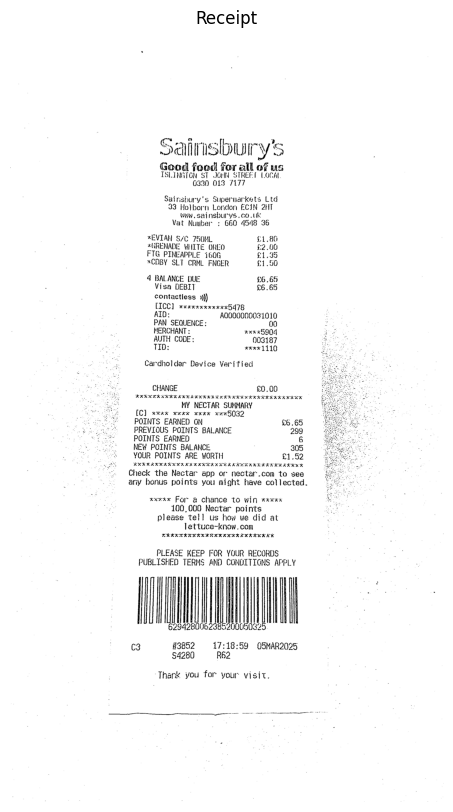

Extracted Text from Preprocessed Image:
Good food for all of us
TSLINGIGN ST JGHN STREET LOCAI.
0330 013 7177

Sainsbury's Supermarkets Ltd
33 Holborn London ECIN 2HT
www. sainsburys .co.uk
Vat Number : 660 4548 36

*EVIAN S/C 750ML £1.80
*GRENADE WHITE OREO £2.00
FTG PINEAPPLE i60G £1.35
*CDBY SLT CRML FNGER £1.56
4 BALANCE DUE £6.65

Visa DEBIT £6.65

contactless })))
LICC] xxxxxxxxxxxx5478

AID: AQ000006031010
PAN SEQUENCE : 00
MERCHANT : xxx x5904
AUTH CODE: 03187
TID: *x*x% 1110

Cardholder Device Verified

CHANGE £0.00
KXAN KANKEK KEKE KKRKRA KEE KRAKEKRK KER ERE RRR KEKE
MY NECTAR SUMMARY

(C] xwx% xxkx xxxx #x%5092

POINTS EARNED ON £6.65
PREVIOUS POINTS BALANCE 299
POINTS EARNED 6
NEW PGINTS BALANCE 305
YOUR POINTS ARE WORTH £1.52

KARKARKAKARNKKARKKAREGRERKKRRARRRERERKEKERNE
Check the Nectar app or nectar.com to see
any bonus points you might have collected.

xaxax For a chance to win x«««s
100,000 Nectar points
please tell us how we did at
lettuce-know. com
TRKKEKRRERRRRRRKR

In [ ]:
import cv2 as cv
import pytesseract
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import re



pytesseract.pytesseract.tesseract_cmd = r'../Tesseract-OCR\tesseract.exe'

image_path = 'img/receipt2.jpg'
img = cv.imread(image_path)

# Convert to grayscale
gray_image = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
blurred_image = cv.GaussianBlur(gray_image, (7, 5),0 )

adaptive_thresh = cv.adaptiveThreshold(
    blurred_image, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 5
)

text_extracted = pytesseract.image_to_string(adaptive_thresh, config="--psm 4")

plt.figure(figsize=(10, 10))
plt.imshow(adaptive_thresh, cmap='gray')
plt.title("Receipt")
plt.axis('off')
plt.show()


print("Extracted Text from Preprocessed Image:")
print(text_extracted)


In [ ]:
#pattern to capture decimal value as price
pricePattern = r'([0-9]+\.[0-9]+)'
print("price line items:")

for row in text_extracted.split("\n"):
	if re.search(pricePattern, row) is not None:
		print(row)

price line items:
*EVIAN S/C 750ML £1.80
*GRENADE WHITE OREO £2.00
FTG PINEAPPLE i60G £1.35
*CDBY SLT CRML FNGER £1.56
4 BALANCE DUE £6.65
Visa DEBIT £6.65
CHANGE £0.00
POINTS EARNED ON £6.65
YOUR POINTS ARE WORTH £1.52


In [ ]:

# Splitting the text into lines and removing any empty lines
lines = [line.strip() for line in text_extracted.splitlines() if line.strip()]

# Regex pattern to capture product name and price not capturing *.
pattern = re.compile(r'^[\*]?(.*?)\s*£(\d+[.,]\d{2})$', re.IGNORECASE)

# List of keywords to skip
skip_keywords = ['balance due', 'visa debit', 'total', 'point','change']

food_items = []
for line in lines:
    if any(keyword in line.lower() for keyword in skip_keywords):
        continue
    
    # Apply regex to capture product and price
    match = pattern.search(line)
    if match:
        item_name = match.group(1).strip()
        price = match.group(2).strip()
    # Replace comma with . for price captured without.
        price = price.replace(',', '.')
        food_items.append((item_name, price))

print("Extracted Food Items:")
for item, price in food_items:
    print(item)



Extracted Food Items:
EVIAN S/C 750ML
GRENADE WHITE OREO
FTG PINEAPPLE i60G
CDBY SLT CRML FNGER


In [ ]:
lines = [line.strip() for line in text_extracted.splitlines() if line.strip()]


pattern = re.compile(r'^[\*]?(.*?)\s*£(\d+[.,]\d{2})$', re.IGNORECASE)

skip_keywords = ['balance due', 'visa debit', 'total', 'point', 'change']

# Dictionary to replace food abbreviations
abbreviations = {
    "CDBY": "Cadbury",
    "SLT": "Salted",
    "CRML": "Caramel",
    "FNGER": "Finger",
}

food_items = []
for line in lines:
    if any(keyword in line.lower() for keyword in skip_keywords):
        continue
    
    match = pattern.search(line)
    if match:
        item_name = match.group(1).strip()
        price = match.group(2).strip()
        
        # convert "i" to "1" for measurements if 1 is not processed but has a G at the end
        item_name = re.sub(r'\bi(\d+G)\b', r'1\1', item_name)
        
        # Replace food item name abbreviations
        for abbr, full_name in abbreviations.items():
            item_name = item_name.replace(abbr, full_name)
        
        # remove measurement units
        item_name = re.sub(r'\b\d+\s*[a-zA-Z]+\b', '', item_name)
        price = price.replace(',', '.')
        item_name = item_name.lower()
        food_items.append((item_name, price))

print("Extracted Food Items:")
for item, price in food_items:
    print(item)


Extracted Food Items:
evian s/c 
grenade white oreo
ftg pineapple 
cadbury salted caramel finger


In [17]:
import re
from rapidfuzz import fuzz
from rapidfuzz import process



# Split the text into lines and remove any empty ones
lines = [line.strip() for line in text_extracted.splitlines() if line.strip()]

# Regex pattern to capture product name and price.
pattern = re.compile(r'^[\*]?(.*?)\s*£(\d+[.,]\d{2})$', re.IGNORECASE)

# List of keywords to skip (balance due, total, etc.)
skip_keywords = ['balance due', 'visa debit', 'total', 'point', 'change']

# Dictionary for abbreviation replacements
abbreviations = {
    "CDBY": "Cadbury",
    "SLT": "Salted",
    "CRML": "Caramel",
    "FNGER": "Finger",
}

# Sample Food Database (In-memory)
food_database = {
    "evian": "2024-12-31",  # Example food items with expiry dates
    "grenade white oreo": "2025-01-15",
    "pineapple": "2025-02-01",
    "cadbury salted caramel finger": "2025-03-10",
}

food_items = []

# Process each line, excluding unwanted terms
for line in lines:
    # Skip lines containing unwanted terms
    if any(keyword in line.lower() for keyword in skip_keywords):
        continue
    
    # Apply regex to capture product and price
    match = pattern.search(line)
    if match:
        item_name = match.group(1).strip()
        price = match.group(2).strip()
        
        # Fix "i" to "1" for measurements like "i60G"
        item_name = re.sub(r'\bi(\d+G)\b', r'1\1', item_name)  # Replace "i" with "1" when followed by digits and "G"
        
        # Replace abbreviations
        for abbr, full_name in abbreviations.items():
            item_name = item_name.replace(abbr, full_name)
        
        # Optionally, remove measurement units (like "750ML" or "160G")
        item_name = re.sub(r'\b\d+\s*[a-zA-Z]+\b', '', item_name)  # Remove any number followed by letters (e.g., "750ML", "160G")
        
        # Replace comma with period for consistency in price
        price = price.replace(',', '.')
        
        # Convert item name to lowercase
        item_name = item_name.lower()
        
        # Add the cleaned item and price to the list
        food_items.append((item_name, price))

# Fuzzy matching to find the best matches from the food database using rapidfuzz
matched_items = []
for item_name, price in food_items:
    # Use fuzzy matching to find the best match from the food database
    match = process.extractOne(item_name, food_database.keys(), scorer=fuzz.token_sort_ratio)
    
    # Extract the matched item and score from the result
    best_match = match[0]  # Best match string
    score = match[1]       # Score of the match
    
    # If the score is above a certain threshold (e.g., 80), consider it a match
    if score >= 70:  # You can adjust this threshold depending on your needs
        expiry_date = food_database[best_match]
        matched_items.append((item_name, price, expiry_date, best_match, score))

# Display the matched food items and their expiry dates
print("Matched Food Items with Expiry Dates:")
for item_name, price, expiry_date, matched_item, score in matched_items:
    print(f"Item: {item_name}, Expiry Date: {expiry_date}, Matched Item: {matched_item}, Score: {score}")


Matched Food Items with Expiry Dates:
Item: evian s/c , Expiry Date: 2024-12-31, Matched Item: evian, Score: 71.42857142857143
Item: grenade white oreo, Expiry Date: 2025-01-15, Matched Item: grenade white oreo, Score: 100.0
Item: ftg pineapple , Expiry Date: 2025-02-01, Matched Item: pineapple, Score: 81.81818181818181
Item: cadbury salted caramel finger, Expiry Date: 2025-03-10, Matched Item: cadbury salted caramel finger, Score: 100.0
